# Linear Neural Newtoks

## Regression
Regression is the hammer we reach for when we want to answer how much? or how many? questions. If you want to predict the number of dollars (price) at which a house will be sold, or the number of wins a baseball team might have, or the number of days that a patient will remain hospitalized before being discharged, then you are probably looking for a regression model.

The linear regression can be expressed as the single-layer neural network. The diagram is shown below:
<div>
<img src="img/regression_as_nn.png" width="500"/>
</div>
where input are $x_1, x_2, \cdots, x_d$, so the number of inputs (or feature dimensionality) in the input layer is d. The output of the network is $o_1$, so the number of outputs in the output layer is 1. conventionally we do not consider the input layer when counting layers. That is to say, the number of layers for the neural network is 1. Since for linear regression, every input is connected to every output (in this case there is only one output), we can regard this transformation (the output layer in this case) as a fully-connected layer or dense layer. 


## Classification

In practice, we are more often interested in classification: asking not “how much” but “which one”. For example, "Does this image depict a donkey, a dog, a cat, or a rooster?".
In terms of classification, we overload the word $\textit{classification}$ to describe two subtly different problems:
1. **hard assignments**: those where we are interested belong to which categories;
2. **soft assignments**: to assess the probability that each category applies.

The distinction tends to get blurred, in part, because often, even when we only care about hard assignments, we still use models that make soft assignments.


### Structure
For classification problem, there are several ouputs instead of one. The probability can be used to classify. For instance, we have images with 4 pixels $x_1, x_2, x_3$ and $x_4$, and 3 possible output categories $o_1$, $o_2$, and $o_3$. The NN below can be used to calculate the probabilities of each categorties of inputs. In this case, an input belongs to the categories with highest probability. 
<div>
<img src="img/softmax_regression_single_layer_nn.png" width="500"/>
</div>
Mathematically, the NN can be written as 
$$
o_1 = x_1w_{11}+x_2w_{12}+x_3w_{13}+x_4w_{14}+b_1 \\
o_2 = x_2w_{21}+x_2w_{22}+x_3w_{23}+x_4w_{24}+b_2 \\
o_3 = x_2w_{31}+x_2w_{32}+x_3w_{33}+x_4w_{34}+b_3 \\
$$
where $w$ with subscripts are weights, and $b$ with subscripts are biases. It can be rewritten as $\mathbf{O}=\mathbf{XW}+\mathbf{b}$.

### Softmax function
In general, we cannot guarantee the logits $o_i$ are nonnegative, neither the sum is 1. Hence, we consider the softmax function, 
$$
\mathbf{\hat y}=\text{softmax}(\mathbf o) \quad \text{where} \quad \hat y_j = \frac{\exp(o_j)}{\sum_k \exp(o_k)},
$$
where $\hat y_j$ are new outputs not $o_j$ anymore.  

Example: if $\hat y_1$, $\hat y_2$, and $\hat y_3$ are 0.1, 0.8, and 0.1, respectively, then we predict category 2. 


### Encode
Before consider the loss function, we need to express labels. For example, the three categories are $y=${dog, cat, chicken}. In general, for categories with natural ordering, like {baby, toddler, adolescent, young adult, adult, geriatric}, we can do like this. But for the categories without any relation, we may use *one-hot encoding*, that is $$y\in\{(1,0,0), (0,1,0), (0,0,1)\}$$

### Loss function
Then Log-Likelihood can be the loss function to measure the quality of our predicted probabilities. If y instead single output $(1,0,0)$, instead an entire distribution over outcomes, like $(0.1, 0.2, 0.7)$, we may use cross-entropy loss function.

### Training
The train can be concluded as following loop:

1. Initialize parameters $(\mathbf w, b)$
2. Repeat until done
     * Computing gradient $g \leftarrow \partial_{(\mathbf w, b)}\frac{1}{|\mathcal B|} \sum_{i\in\mathcal B}l^{(i)}(x^{(i)}, y^{(i)}, \mathbf w, b)$, where $l$ is the loss function;
     * Updating parameters $(\mathbf w, b) \leftarrow (\mathbf w, b) - \eta g$, where $\eta$ is the learning rate.

## Some Preliminaries 

### With statement

 'with' statment can be used to manage external resourses who support 'context management protocal', like I/O and network connections.  For example, it replaces the work of try...finally... block, by releasing the memeory automatically. Or it disconnects the network automatically. It makes code clearer and safer.
 
 Example:
 
 
     with open("hello.txt", mode="w") as file:
 
         file.write("Hello, World!")
 
 In this case, developers do not need to call close() method with try...catch...finally block manually.
 
 A good explanation and more examples can be found in https://realpython.com/python-with-statement/#managing-resources-in-python 

### Automatic Differentiation

Automatic differentiation enables the system to subsequently backpropagate gradients. 

Examples:
The gradient of $y=x^Tx$

In [142]:
from d2l import mxnet as d2l
from mxnet import autograd, np, npx
npx.set_np()

x = np.arange(4.0)
# We allocate memory for a tensor's gradient by invoking `attach_grad`
x.attach_grad()
# After we calculate a gradient taken with respect to `x`, we will be able to
# access it via the `grad` attribute, whose values are initialized with 0s
x.grad # ==> array([0., 0., 0., 0.])

# Place our code inside an `autograd.record` scope to build the computational graph
with autograd.record():
    y = 2 * np.dot(x, x) 
#we can automatically calculate the gradient of y w.r.t. each component of x 
#by calling the function backward() for backpropagation and printing the gradient.
y.backward()
x.grad # ==> array([ 0., 4., 8., 12.])

#The function y = 2 * np.dot(x, x) can be replaced by a user defined function def func():

#If a function contains several variables with composite relations, like z(x,y(x)), 
#and we wanted for some reason to treat y as a constant, the detach() method can be used. see => mxnet document



array([ 0.,  4.,  8., 12.])

Technically, when y is not a scalar, the most natural interpretation of the differentiation of a vector y with respect to a vector x is a matrix. For higher-order and higher-dimensional y and x, the differentiation result could be a high-order tensor. **The calculation of high dimensional cases can be found in some notes.**

The derivative of matrix or high-order case could be complicated, but more often when we are calling backward on a vector, we are trying to calculate the derivatives of the loss functions for each constituent of a batch of training examples. 

Here, our intent is **not to calculate the differentiation matrix** but rather the sum of the partial derivatives computed individually for each example in the batch. 

In [143]:
# When we invoke `backward` on a vector-valued variable `y` (function of `x`),
# a new scalar variable is created by summing the elements in `y`. Then the
# gradient of that scalar variable with respect to `x` is computed
with autograd.record():
    y=x*x #`y`is a vector
y.backward()
x.grad # !!! Equals to y = sum(x * x) !!!

array([0., 2., 4., 6.])

### Iterator

An iterator is an object that contains a countable number of values.

An iterator is an object that can be iterated upon, meaning that you can traverse through all the values.

Technically, in Python, an iterator is an object which implements the iterator protocol, which consist of the methods `__iter__()` and `__next__()`.


**iterable vs iterator**

Lists, tuples, dictionaries, and sets are all iterable objects. They are iterable containers which you can get an iterator from.

All these objects have a `iter()` method which is used to get an iterator:

### Global and local variables

Local variable: A variable created inside a function belongs to the local scope of that function, and can only be used inside that function.

Global variables are the ones that are defined and declared outside any function and are not specified to any function. They can be used by any part of the program.

If you operate with the same variable name inside and outside of a function, Python will treat them as two separate variables, one available in the global scope (outside the function) and one available in the local scope (inside the function):

While the code below occurs error, since we print `s`, i.e. s referenced, before we assign `s = "I am not"`

In [144]:
"""
def f():  
    print(s) 
    
    # This program will NOT show error 
    # if we comment below line.  
    s = "I am not."
    
    print(s)
    
# Global scope 
s = "I am global variable" 
f() 
print(s)
"""

'\ndef f():  \n    print(s) \n    \n    # This program will NOT show error \n    # if we comment below line.  \n    s = "I am not."\n    \n    print(s)\n    \n# Global scope \ns = "I am global variable" \nf() \nprint(s)\n'

    ---------------------------------------------------------------------------
    UnboundLocalError                         Traceback (most recent call last)
    <ipython-input-50-b7539c56286c> in <module>
         10 # Global scope
         11 s = "I am global variable"
    ---> 12 f()
         13 print(s)

    <ipython-input-50-b7539c56286c> in f()
          1 def f():
    ----> 2     print(s)
          3 
          4     # This program will NOT show error
          5     # if we comment below line.

    UnboundLocalError: local variable 's' referenced before assignment


In [145]:
#Eaxmple
mytuple = ("apple", "banana", "cherry")
myit = iter(mytuple)

print(next(myit))
print(next(myit))
print(next(myit))

# So, mytuple is a iterable object, and myit is its iterator.

apple
banana
cherry


## An example for LNN: Image classification 

In [146]:
%matplotlib inline
from d2l import mxnet as d2l
from mxnet import autograd, np, npx, gluon
import sys
from IPython import display

d2l.use_svg_display() #Use the svg format to display a plot in Jupyter
npx.set_np()

### Import the data from MNIST dataset

In [147]:
mnist_train = gluon.data.vision.FashionMNIST(train=True)
mnist_test  = gluon.data.vision.FashionMNIST(train=False)
type(mnist_train[0])

tuple

check the size of train and test data

In [148]:
len(mnist_train), len(mnist_test)

(60000, 10000)

The shape of each image

In [149]:
mnist_train[0][0].shape

(28, 28, 1)

In [150]:
def get_fashion_mnist_labels(labels):
    """Return text labels for the Fashion-MNIST dataset."""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                  'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

Function of visualize these examples.

In [151]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5): #@save
    """Plot a list of images."""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
#    print(axes)
#    print('\n')
    axes = axes.flatten() #flatten() make axes one-dimensional
                          # axes is a object of matplotlib.axes._subplots.AxesSubplot
#    print(axes)
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        ax.imshow(d2l.numpy(img))
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

#zip() function takes iterables (can be zero or more), aggregates them in a tuple, and returns it.

#subplots() function return a figure object and a tuple containing axes objects. 

# figure object: The top level container for all the plot elements.
#   see: https://matplotlib.org/stable/api/figure_api.html?highlight=matplotlib%20figure#module-matplotlib.figure

# axes object: The Axes contains most of the figure elements: Axis, Tick, Line2D, Text, Polygon, etc.,
#              and sets the coordinate system. 
#   see: https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes

In [152]:
#Example of zip function

languages = ['Java', 'Python', 'JavaScript']
versions = [14, 3, 6]

result = zip(languages, versions)
print(list(result))

[('Java', 14), ('Python', 3), ('JavaScript', 6)]


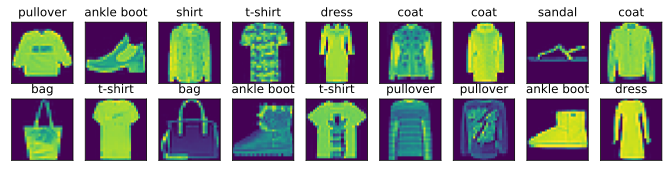

In [153]:
X, y = mnist_train[: 18] #each element of mnist_train is a tuple contains an image X (a numpy array), and a label y
show_images(X.squeeze(axis=-1), 2, 9, titles=get_fashion_mnist_labels(y), scale=1.3);
#numpy.squeeze: Remove axes of length one from a. 
#    Since the shape of X is (28,28,1), X.squeeze(axis=-1) means (28,28)

### Reading a minibatch
For the consideration of speed, the algortihm of optimizing that we usually use is **minibatch stochastic** gradient descent.

In [154]:
batch_size = 256

def get_dataloader_workers(): #@save
    """Use 4 processes to read the data excepte for Windows."""
    return 0 if sys.platform.startswith('win') else 4


# `ToTensor` converts the image data from uint8 to 32-bit floating point.
# It divides all numbers by 255 so that all pixel values are between 0 and 1 
transformer = gluon.data.vision.transforms.ToTensor()

#we use the built-in data iterator for reading the training and test sets.
train_iter = gluon.data.DataLoader(mnist_train.transform_first(transformer), 
                                   batch_size, shuffle=True,
                                   num_workers=get_dataloader_workers())
#gluon.data.DataLoader(dataset, batch_size=None, shuffle=False, sampler=None, 
#           last_batch=None, batch_sampler=None, batchify_fn=None,
#           num_workers=0, pin_memory=False, pin_device_id=0, 
#           prefetch=None, thread_pool=False, timeout=120)
# Loads data from a dataset and returns mini-batches of data.

#transform_first() function provided by Gluonʼs dataset 
#applies image augmentation to the first element of each training example (image and label),
#i.e., the element at the top of the image

#Deep networks need large amount of training data to achieve good performance. 
#To build a powerful image classifier using very little training data, 
#image augmentation is usually required to boost the performance of deep networks. 
#Image augmentation artificially creates training images 
#through different ways of processing or combination of multiple processing, 
#such as random rotation, shifts, shear and flips, etc.

The time it takes to read the training data:

In [155]:
timer = d2l.Timer()
for X, y in train_iter:
    continue
f'{timer.stop():.2f} sec'

'1.75 sec'

### Reading data
Then, we define the load_data_fashion_mnist function that obtains and reads the Fashion-MNIST dataset. It returns the data iterators for both the training set and validation set. In addition, it accepts an optional argument to resize images to another shape.

In [156]:
def load_data_fashion_mnist(batch_size, resize=None): #@save
    """Download the Fashion-MNIST dataset and then load it into memory."""
    dataset = gluon.data.vision #define dataset = gluon.data.vision
    trans = [dataset.transforms.ToTensor()] #trans here is a list with object 'dataset.transforms.ToTensor()'
    if resize:
        trans.insert(0, dataset.transforms.Resize(resize)) #list.insert(i, elem): elem is inserted to the list 
                                                           #at the i-th index
    trans = dataset.transforms.Compose(trans)  #transforms.Compose(input) :Sequentially composes multiple transforms.
                                               #input should be a list. 
    mnist_train = dataset.FashionMNIST(train=True).transform_first(trans)
    mnist_test = dataset.FashionMNIST(train=False).transform_first(trans)
    return (gluon.data.DataLoader(mnist_train, batch_size, shuffle=True,
                                  num_workers=get_dataloader_workers()),
            gluon.data.DataLoader(mnist_test, batch_size, shuffle=False,
                                  num_workers=get_dataloader_workers()))

Below we test the image resizing feature of the load_data_fashion_mnist function 
by specifying the resize argument.

In [157]:
#Example
train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

(32, 1, 64, 64) float32 (32,) int32


## Implementation of softmax regression from scrath

In [158]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

We first need to define and initialize the parameters

In [159]:
num_inputs = 784 #flatten images with size 28*28
num_outputs = 10 #10 categories

W = np.random.normal(0, 0.01, (num_inputs, num_outputs))
b = np.zeros(num_outputs)
W.attach_grad()
b.attach_grad()

Then, the softmax function

In [160]:
def softmax(X):
    X_exp = np.exp(X)
    partition = X_exp.sum(1, keepdims=True)
    return X_exp / partition #The broadcasting mechanism is applied here

Now that we have defined the softmax operation, we can implement the softmax regression model.

In [161]:
def net(X):
    return softmax(np.dot(X.reshape((-1, W.shape[0])), W) + b) #-1 means the 0th dimension is decided by np, 
                        #we only need to guarantee that the 1th dimension and the 0th dimension of W are identical.

Define loss function. Since classification problems far outnumber regression problems, we use cross-entropy loss function 

In [162]:
def cross_entropy(y_hat, y):
    return - np.log(y_hat[range(len(y_hat)), y])

Accuracy of classification. To computer the accuracy we do the following. First, we assume y_hat is a matrix, where the i-th row stores prediction socres for each category of the i-th train sample. We use argmax to obtain the predicted calss by the index for entry in each row. Then we compare the predicted class with y elementwise. Since the equality operator == is sensitive to data types, we convert y_hat's data type to match that of y. The result is a tensor containing entries of 0(false) and 1(true). Taking the sum yields the number of correct predictions.

In [163]:
def accuracy(y_hat, y): #@save
    """Compute the number of correct predictions."""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.astype(y.dtype) == y
    return float(d2l.reduce_sum(cmp.astype(y.dtype)))

Similarly, we can evaluate the accuracy for any model net on a dataset that is accessed via the data iterator data_iter.

In [164]:
def evaluate_accuracy(net, data_iter): #@save
    """Compute the accuracy for a model on a dataset."""
    metric = Accumulator(2) # No. of correct predictions, no. of predictions
    for _, (X, y) in enumerate(data_iter): #the first valuable _, is the counter (or index)
        metric.add(accuracy(net(X), y), y.size)
    return metric[0] / metric[1]

#enumerate: a for loop is usually written as a loop over an iterable object
#Rather than creating and incrementing a variable yourself, 
#you can use Python’s enumerate() to get a counter and the value from the iterable at the same time!

Here Accumulator is a utility class to accumulate sums over multiple variables. In the above evaluate_accuracy function, we create 2 variables in the Accumulator instance for storing both the number of correct predictions and the number of predictions, respectively. Both will be accumulated over time as we iterate over the dataset.

In [165]:
class Accumulator: #@save
    """For accumulating sums over `n` variables."""
    def __init__(self, n):
        self.data = [0.0] * n
    
    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]
    
    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

### Training

First, we define a function to train for one epoch. Note that updater is a general function to update the model parameters, which accepts the batch size as an argument. It can be either a wrapper of the `d2l.sgd` function or a frameworkʼs built-in optimization function.

In [166]:
def train_epoch_ch3(net, train_iter, loss, updater): #@save
    """Train a model within one epoch (defined in Chapter 3)."""
    # Sum of training loss, sum of training accuracy, no. of examples
    metric = Accumulator(3)
    if isinstance(updater, gluon.Trainer):      
        #gluon.Trainer is a class
        #mxnet.gluon.Trainer(params, optimizer, optimizer_params=None, 
        #                    kvstore='device', compression_params=None, 
        #                   update_on_kvstore=None)
        print('1111111') # ==> no output
        updater = updater.step #updater=d2l.sgd([W, b], lr, batch_size)
        # step (a method): Makes one step of parameter update.
        
    for X, y in train_iter:
        # Compute gradients and update parameters
        with autograd.record():
            y_hat = net(X)
            l = loss(y_hat, y)
        l.backward()
        updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.size)
    # Return training loss and training accuracy
    return metric[0] / metric[2], metric[1] / metric[2]

#isinstance(object, classinfo)
#Return True if the object argument is an instance of the classinfo argument, 
#    or of a (direct, indirect or virtual) subclass thereof. 
#If object is not an object of the given type, the function always returns False. 
#If classinfo is a tuple of type objects (or recursively, other such tuples), 
#    return True if object is an instance of any of the types. 
#If classinfo is not a type or tuple of types and such tuples,
#    a TypeError exception is raised.



Before showing the implementation of the training function, we define a utility class that plot data in animation. Again, it aims to simplify code in the rest of the book.

In [167]:
class Animator: #@save
    """For plotting data in animation."""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # Incrementally plot multiple lines
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # Use a lambda function to capture arguments
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts
        
    def add(self, x, y):
        # Add multiple data points into the figure
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

The following training function then trains a model net on a training dataset accessed via **train_iter** for multiple epochs, which is specified by num_epochs. At the end of each epoch, the model is evaluated on a testing datas

In [168]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater): #@save
    """Train a model (defined in Chapter 3)."""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc 
    assert test_acc <= 1 and test_acc > 0.7, test_acc

As an implementation from scratch, we use the minibatch stochastic gradient descent to optimize the loss function of the model with a learning rate 0.1.

In [169]:
lr = 0.15

def updater(batch_size):
    return d2l.sgd([W, b], lr, batch_size)

Now we train the model with 10 epochs. Note that both the number of epochs (num_epochs), and learning rate (lr) are adjustable hyperparameters. By changing their values, we may be able to increase the classification accuracy of the model.

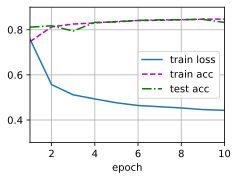

In [170]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

### Prediction

Now that training is complete, our model is ready to classify some images. Given a series of im- ages, we will compare their actual labels (first line of text output) and the predictions from the model (second line of text output).

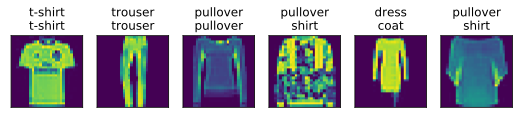

In [171]:
def predict_ch3(net, test_iter, n=6): #@save
    """Predict labels (defined in Chapter 3)."""
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(d2l.argmax(net(X), axis=1))
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(d2l.reshape(X[0:n], (n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)

## Concise implementation of softmax regression

Using the high-level APIs of deep learning frameworks we can implement the same thing with a few code

In [172]:
from d2l import mxnet as d2l
from mxnet import gluon, init, npx 
from mxnet.gluon import nn 
npx.set_np()

In [173]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

Initialize model paramter, call loss function and optimization algorithm

In [174]:
net = nn.Sequential()
net.add(nn.Dense(10))
net.initialize(init.Normal(sigma=0.01))

loss = gluon.loss.SoftmaxCrossEntropyLoss()

trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.1})

Train

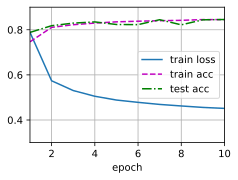

In [175]:
num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter,loss, num_epochs, trainer)